## IF YOU LIKE THE KERNEL PLZ UPVOTE IT!!


The study aims to determine how much of the adjustment parameters in 3d printers affect print quality, accuracy, and strength. There are nine setting parameters and three measured output parameters.

Setting Parameters:
* Layer Height (mm)
* Wall Thickness (mm)
* Infill Density (%)
* Infill Pattern ()
* Nozzle Temperature (Cº)
* Bed Temperature (Cº)
* Print Speed (mm/s)
* Material ()
* Fan Speed (%)

Output Parameters: (Measured)
* Roughness (µm)
* Tension (ultimate) Strength (MPa)
* Elongation (%)

Those interested in printers are very familiar with these terms. The first 9 parameters here are printer print settings, so the others don't change when you change any. However, the surface roughness, Tensile strength and Tensile percent elongation vary according to these first nine parameters. So which parameter affects how much. Here we will seek the answer to this question.

# 1. Importing Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
import tensorflow as tf

# 2. Reading Data and Preprocessing

This data is based on the Ultimaker S5 3-D printer settings and filaments. Material and strength tests were carried out on a Sincotec GMBH tester capable of pulling 20 kN.

In [2]:
df = pd.read_csv("../input/3dprinter/data.csv")

In [3]:
df = df.rename(columns={"tension_strenght": "tensile_strength"})

In [4]:
df

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7
5,0.02,10,40,honeycomb,200,60,40,pla,0,60,24,1.1
6,0.02,5,10,grid,205,65,40,pla,25,55,12,1.3
7,0.02,10,10,honeycomb,210,70,40,pla,50,21,14,1.5
8,0.02,9,70,grid,215,75,40,pla,75,24,27,1.4
9,0.02,8,40,honeycomb,220,80,40,pla,100,30,25,1.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tensile_strength    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


* There are only 50 examples. 
* Also there is no null values in any column.
* There are two *object* type column, `infill_pattern` and `material`, lets take a look at them

In [6]:
df.infill_pattern.value_counts()

honeycomb    25
grid         25
Name: infill_pattern, dtype: int64

In [7]:
df.material.value_counts()

abs    25
pla    25
Name: material, dtype: int64

Both have two unique values and are equally balanced.

Now let's take a unique values of all columns

In [8]:
for column in df.columns:
    print(str(column)+": "+str(df[column].unique()))
    print()

layer_height: [0.02 0.06 0.1  0.15 0.2 ]

wall_thickness: [ 8  7  1  4  6 10  5  9  2  3]

infill_density: [90 80 70 40 10 20 50 30 60]

infill_pattern: ['grid' 'honeycomb']

nozzle_temperature: [220 225 230 240 250 200 205 210 215]

bed_temperature: [60 65 70 75 80]

print_speed: [ 40  60 120]

material: ['abs' 'pla']

fan_speed: [  0  25  50  75 100]

roughness: [ 25  32  40  68  92  60  55  21  24  30  75 118 200 220 126 145  88  74
 120 144 265 312 368 180 176 128 138 121 168 154 225 289 326 192 212 172
 163 276 298 360 357 321 278 244]

tensile_strength: [18 16  8 10  5 24 12 14 27 25 37  9 23 26 33 29 19 11 34 13 22  4 35 28
 21 30]

elongation: [1.2 1.4 0.8 0.5 0.7 1.1 1.3 1.5 1.7 2.4 1.  2.2 1.9 1.6 2.1 2.  0.9 0.4
 1.8 2.9 0.6 2.8 2.3 3.3 3.1 2.7 3.2]



Let's briefly take a look at our data set. For 5 different layer thicknesses, tests were carried out for two different materials at randomly changing wall thickness and occupancy rates, and for two different occupancy patterns. The writing speed started to decrease after a certain value so that the correlation did not increase continuously. Again, the material was evenly distributed throughout the tests.

Our target columns `roughness`, `tension_strength` and `elongation` seems to have multiple values. So this is a regression problem.

As you know, there are some categorical and font data here. Now let's convert these String values to numbers.

In [9]:
#In this data set, ABS and PLA assigned 0 and 1 values for materials (abs = 0, pla = 1)
df.material = [0 if each=='abs' else 1 for each in df.material]

#In this data set, grid and honeycomb assigned 0 and 1 values for infill_pattern (grid = 0, honeycomb = 1)
df.infill_pattern = [0 if each=='grid' else 1 for each in df.infill_pattern]

df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,0.02,8,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6,90,0,250,80,40,0,100,92,5,0.7


To make it more understandable, Let's multiply the height of the layer and the decimal data, which is elongation, by 100.

In [10]:
df.layer_height = df.layer_height*100
df.elongation = df.elongation*100

In [11]:
corr = df.corr()
corr.style.background_gradient(cmap='Accent').set_precision(2)

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
layer_height,1.00,-0.19,0.00,0.00,-0.00,0.00,-0.06,-0.00,0.00,0.80,0.34,0.51
wall_thickness,-0.19,1.00,0.10,0.15,-0.12,-0.03,-0.42,0.12,-0.03,-0.23,0.40,0.18
infill_density,0.00,0.10,1.00,-0.17,0.24,0.00,-0.09,-0.26,0.00,0.12,0.36,0.16
infill_pattern,0.00,0.15,-0.17,1.00,-0.17,0.00,0.00,0.20,0.00,-0.07,0.01,0.05
nozzle_temperature,-0.00,-0.12,0.24,-0.17,1.00,0.60,0.00,-0.78,0.60,0.35,-0.41,-0.53
bed_temperature,0.00,-0.03,0.00,0.00,0.60,1.00,0.00,0.00,1.00,0.19,-0.25,-0.30
print_speed,-0.06,-0.42,-0.09,0.00,0.00,0.00,1.00,0.00,0.00,0.12,-0.26,-0.23
material,-0.00,0.12,-0.26,0.20,-0.78,0.00,0.00,1.00,0.00,-0.23,0.29,0.39
fan_speed,0.00,-0.03,0.00,0.00,0.60,1.00,0.00,0.00,1.00,0.19,-0.25,-0.30
roughness,0.80,-0.23,0.12,-0.07,0.35,0.19,0.12,-0.23,0.19,1.00,0.05,0.10


This is a correlation matrix, which gives a matrix in which each cell gives a value ranging from -1 to 1, which shows the how correlated that particular row is with column or vice-versa.

In [12]:
target_cols = ['tensile_strength', 'roughness', 'elongation']
y = df[target_cols].values
x = df.drop(target_cols,axis=1).values

# 3. Domain Knowledge

## **Classification**:

There are various technologies that produce products through different additive manufacturing processes like powder bed fusion, photopolymerisation Material extrusion and jetting, Sheet lamination, etc. Some of the technologies are listed below in detail.

## Stereolithography (SLA):

SLA uses a vat of curable photopolymer resin (polymer that changes properties when exposed to light). It is a high end technology utilizing laser technology to cure layer-upon-layer of photopolymer resin. The build occurs in a pool of resin. The UV light solidifies the resin it touches and each layer is applied by submersion of the build platform into the resin. The process repeats until the build or model is completed and fascinating to watch. SLA is the technique that produces the finest surface finish and dimensional accuracy. It requires a support structure under production, which has to be removed at post-production.

## Selective Laser Sintering (SLS):

SLS is a powder¬‐based process where a CO2 laser fuses small particles of plastic, metal, ceramic or glass in layers, directed by a computer¬‐guided mirror. The build platform progresses downwards as each layer is built. Delivery chambers rises to provide a roller with fresh powder that is being uniformly spread over the build area. Unlike SLA technology, support material is not needed as the build is supported by unsintered material.

## Direct metal laser sintering (DMLS):

Direct Metal Laser Sintering or DMLS is an additive manufacturing technique for metal 3D printing that was developed by EOS. It uses a laser as a power source in order to sinter metal powder by aiming a laser and tracing a cross section of the object layer by layer. An expendable first layer of the part is anchored to a steel plate to stop distortion, which makes removal easier when the build is complete. Direct Metal Laser Sintering is similar to the selective laser sintering process.

## Fused deposition modeling (FDM):

It is mainly used by individuals and is the most affordable 3D printing process compared to other 3D printing technologies. FDM produces 3D parts by melting and advancing a fine ribbon of production grade thermoplastic materials through a computer controlled extrusion head, producing parts that are ready to use. The nozzles trace the cross-section pattern for each particular layer with the thermoplastic material hardening prior to the application of the next layer. Similar to SLA, the models can be machined or used as patterns. This method requires a supportive structure to be printed, but the strength to weight ratio is very high.

## Digital Light Processing (DLP):

DLP is a 3D printing process where a projector cures photopolymer resin. Similar to SLA, a safelight (bulb) is used instead of a UV laser to cure the photopolymer resin. Objects are created the same as SLA with the object being either pulled out of the resin which creates space for the uncured resin at the bottom of the container and to form the next layer of the object or down into the tank with the next layer being cured on the top.

## Material Jetting Modeling (MJM):

MJM is similar to an inkjet printer that travels back and forth in all the 3 dimensions (x, y, z). It contains a number of small jets that apply a layer of thermopolymer material and proceed from layer to layer.

Besides these, various other technologies also are arising in the field of additive manufacturing. Some of them are:

* Electron beam melting (EBM)
* Binder jetting
* Continuous liquid Interface production (CLIP)
* Selective deposition lamination

How do the various types of 3D printers vary? What materials do they use? Which ones are best for detail? How hard is post processing? Which ones will try to kill me? All of these questions and much more are answered in this video!

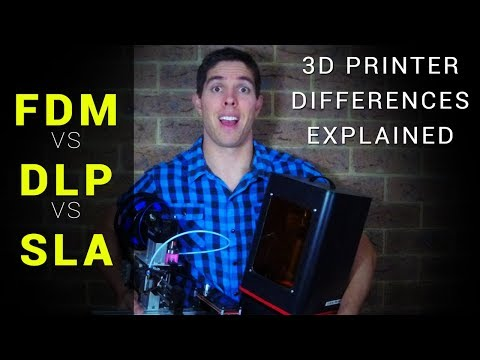

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo('3lRhZTdafE4', width=800, height=450)

Before digging into EDA, lets have some domain knowledge.

Starting with material, here are only two unique materials given but there are many.

## Which Ultimaker material should I use?

When you select a print material, it is important to consider the characteristics of the object you want to print and the environment in which it will be used. Ideally, you will select your print material based on material characteristics such as:

* Technical properties
* Aesthetic qualities
* Processing ability

The following material descriptions will help you select the right material for your 3D printing application. 

## PLA (polylactic acid)
PLA is a biodegradable polymer that is ideal for prototyping 3D models with pleasing aesthetics. It has good surface quality, is somewhat glossy, and prints details with a high resolution. PLA is a reliable and easy-to-print material that can be printed at low temperatures. It has a low shrinkage factor and does not require the use of a heated build plate. It is the perfect choice for creating concept models, visualization aids, or for use in education.

Overall, PLA is not as tough as more technical materials but does have a high tensile strength. It is not recommended for functional and mechanical parts. Items printed with PLA can lose their mechanical properties and may become brittle over time.

## Tough PLA (polylactic acid)
Tough PLA combines the ease of printing that is typical for PLA with increased mechanical performance. Specifically, Tough PLA has an increased impact resistance and therefore does not have the same brittle failure as normal PLA. It has a good surface quality and the 3D prints have a more matte appearance. Ultimaker Tough PLA can be used for functional prototyping, tooling and manufacturing aids.

Note: The temperature resistance of Tough PLA is similar to PLA and limited to approximately 60°C. 

## ABS (acrylonitrile butadiene styrene)
ABS is a well-known material used by professionals for mechanical and technical applications. It has excellent mechanical properties and can be used for objects that require toughness and durability. With a thermal resistance of up to 85 °C, ABS can be used in warm environments. These properties make ABS a good choice for prototyping and fit testing.

Ultimaker ABS is specially formulated to minimize warping and ensure consistent interlayer adhesion.  This makes it easier to use than standard ABS filaments. Ultimaker ABS has pleasing aesthetics and results in a matte finish when printed.

Note: ABS is adversely affected by exposure to UV light, so it is strongly recommended not to use ABS for applications that are exposed to UV light for extended periods.

*Apart from these, there are many materials, if you want to know more about them, check out this [link](https://support.ultimaker.com/hc/en-us/articles/360011940320-Which-Ultimaker-material-should-I-use-)*
* **CPE (co-polyester)**
* **CPE+ (co-polyester)**
* **PC (polycarbonate)**
* **Nylon (polyamide)**
* **TPU 95A (thermoplastic polyurethane)**
* **PP (polypropylene)**
* **PVA (polyvinyl alcohol)**

**If you want to know more about 3D printing, its types and parameter, check out these [link1](https://my3dmatter.com/influence-infill-layer-height-pattern/), [link2](https://iitism.ac.in/iraa/lamps/blog.php)**

# 4. EDA

Improving the mechanical performance of a printed part often comes at the expense of printing speed, affordability and quality. In this study we quantify the impact of different layer heights and infill settings on performance, and we try to help users choose the optimal settings by clearly laying out the trade-offs faced by the user. We provide the layer height and infill settings we would pick depending on the application requirements.

The key parameters we look into are infill %, layer height and infill pattern. In the main body of this study, we provide a detailed description of the influence these parameters have on max stress, elongation at break, rigidity (Young Modulus) and yield stress.

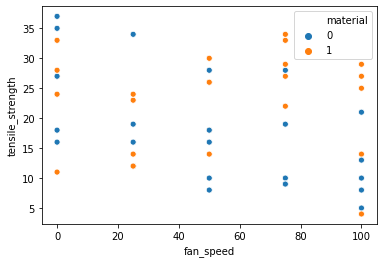

In [14]:
sns.scatterplot(x=df.fan_speed,y=df.tensile_strength,hue=df.material)

As can be seen from the distribution, the Nozzle fan provides a good layer adhesion for Pla, while creating a negative effect for Abs. Ultimaker's website has already focused on this issue. Abs is a material that does not like air circulation in the environment. Although according to correlation matrix there seems to be negative correlation between fan speed and tensile_stregth but remember we are also using material data here and material & tensile_strength has 0.29 correlation b/w them, that's why we should explore data as much as possible.
Also, you can also say, if you are using ABS, keep fan speed low, to get a higher tensile strength.

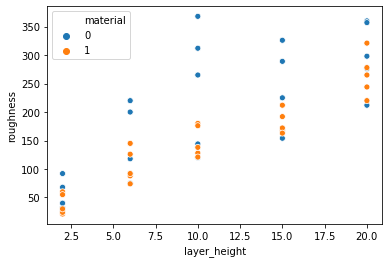

In [15]:
sns.scatterplot(x=df.layer_height,y=df.roughness,hue=df.material)

From the correlation matrix, roughness and layer_height/thickness has a very high correlation, and the above graph confirms that the surface roughness depends solely on the layer thickness.

Even if we thought correctly, we can see that ABS material is superior in the graphic, ***but do we require low roughness or high??*** Well the answer is it depends on the use of product you are making (for example if you are printing a mobile back cover, so you want it to be little bit rough so that it doesn't slip through from your hand)

You have anticipated that there will be an increasing relationship between solidity ratio, Wall thickness and Break strength. Let's remember from the strength, MPa = Force / Area, since these two variables will affect the area, the rupture strength will be a parameter highly dependent on them.

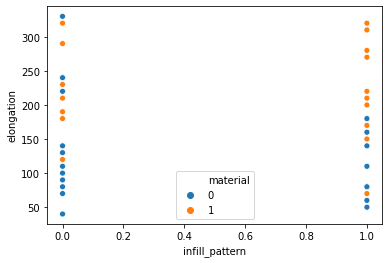

In [16]:
sns.scatterplot(x=df.infill_pattern,y=df.elongation,hue=df.material)

Here also is some good insight you can find. Remember there are two `infill_pattern` in this dataset (grid = 0, honeycomb = 1). First thing you can notice when `infill_pattern` is 1 i.e. *honeycomb*, it is clear that there is more elongation when the material used is *PLA*. It can be also true when `infill_pattern` is 0 i.e. *grid*, but we can't say for sure because there are some cases in which *ABS* is showing more elongation. So, in general we can say we should use ABS if we want low elongation, using either patterns of infill.

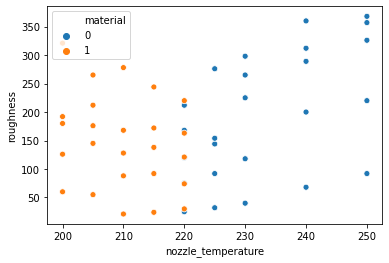

In [17]:
sns.scatterplot(x=df.nozzle_temperature,y=df.roughness,hue=df.material)

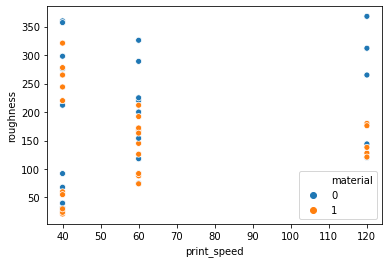

In [18]:
sns.scatterplot(x=df.print_speed,y=df.roughness,hue=df.material)

# 5. Model Training

LET'S GET TO MACHINE LEARNING!

Let's examine our dataset. Here we need to normalize our data set. An important point: We will compress our data between 0 and 1 since the variables in our data set cannot fall within certain limit values.

## NOTE: This dataset consists of only 50 examples, and I am trying NN here, though using any tree regressor 100% accuracy (that might be Overfitting, but we can't do anything about it).

In [49]:
model = tf.keras.Sequential([
tf.keras.layers.Input(9),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(1024),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.38),    
tf.keras.layers.PReLU(),   
tf.keras.layers.Dense(256),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.35),
tf.keras.layers.PReLU(),    
tf.keras.layers.Dense(3, activation="sigmoid")
])

model.compile(tf.optimizers.Adam(lr = 1e-3),loss='mean_squared_error',metrics=['accuracy'])

In [56]:
for n, (tr, te) in enumerate(KFold(n_splits=5, shuffle=True).split(x)):
    print(f'Fold {n+1}')

    history = model.fit(x[tr],y.astype(float)[tr],
                validation_data=(x[te], y.astype(float)[te]),
                epochs=45, batch_size=8, verbose=2)
    print('')
    

Fold 1
Epoch 1/45
5/5 - 0s - loss: 24184.1250 - accuracy: 0.5000 - val_loss: 24133.1211 - val_accuracy: 0.6000
Epoch 2/45
5/5 - 0s - loss: 24184.1211 - accuracy: 0.5000 - val_loss: 24133.1211 - val_accuracy: 0.6000
Epoch 3/45
5/5 - 0s - loss: 24184.1328 - accuracy: 0.3000 - val_loss: 24133.1211 - val_accuracy: 0.6000
Epoch 4/45
5/5 - 0s - loss: 24184.1191 - accuracy: 0.6000 - val_loss: 24133.1211 - val_accuracy: 0.6000
Epoch 5/45
5/5 - 0s - loss: 24184.1289 - accuracy: 0.4750 - val_loss: 24133.1211 - val_accuracy: 0.6000
Epoch 6/45
5/5 - 0s - loss: 24184.1250 - accuracy: 0.4500 - val_loss: 24133.1211 - val_accuracy: 0.6000
Epoch 7/45
5/5 - 0s - loss: 24184.1191 - accuracy: 0.5000 - val_loss: 24133.1211 - val_accuracy: 0.6000
Epoch 8/45
5/5 - 0s - loss: 24184.1211 - accuracy: 0.4750 - val_loss: 24133.1211 - val_accuracy: 0.6000
Epoch 9/45
5/5 - 0s - loss: 24184.1211 - accuracy: 0.6500 - val_loss: 24133.1211 - val_accuracy: 0.6000
Epoch 10/45
5/5 - 0s - loss: 24184.1211 - accuracy: 0.475

5/5 - 0s - loss: 24398.3066 - accuracy: 0.4250 - val_loss: 23276.3477 - val_accuracy: 0.8000
Epoch 35/45
5/5 - 0s - loss: 24398.3066 - accuracy: 0.4750 - val_loss: 23276.3477 - val_accuracy: 0.8000
Epoch 36/45
5/5 - 0s - loss: 24398.3145 - accuracy: 0.5500 - val_loss: 23276.3477 - val_accuracy: 0.8000
Epoch 37/45
5/5 - 0s - loss: 24398.3027 - accuracy: 0.3250 - val_loss: 23276.3477 - val_accuracy: 0.8000
Epoch 38/45
5/5 - 0s - loss: 24398.3125 - accuracy: 0.3750 - val_loss: 23276.3457 - val_accuracy: 0.8000
Epoch 39/45
5/5 - 0s - loss: 24398.3066 - accuracy: 0.5000 - val_loss: 23276.3457 - val_accuracy: 0.8000
Epoch 40/45
5/5 - 0s - loss: 24398.3027 - accuracy: 0.4500 - val_loss: 23276.3457 - val_accuracy: 0.8000
Epoch 41/45
5/5 - 0s - loss: 24398.3086 - accuracy: 0.5250 - val_loss: 23276.3457 - val_accuracy: 0.8000
Epoch 42/45
5/5 - 0s - loss: 24398.3086 - accuracy: 0.5250 - val_loss: 23276.3457 - val_accuracy: 0.8000
Epoch 43/45
5/5 - 0s - loss: 24398.3047 - accuracy: 0.5750 - val_lo

Epoch 23/45
5/5 - 0s - loss: 24114.4102 - accuracy: 0.4500 - val_loss: 24411.9062 - val_accuracy: 0.7000
Epoch 24/45
5/5 - 0s - loss: 24114.4102 - accuracy: 0.6250 - val_loss: 24411.9062 - val_accuracy: 0.7000
Epoch 25/45
5/5 - 0s - loss: 24114.4062 - accuracy: 0.6250 - val_loss: 24411.9062 - val_accuracy: 0.7000
Epoch 26/45
5/5 - 0s - loss: 24114.4062 - accuracy: 0.3750 - val_loss: 24411.9062 - val_accuracy: 0.7000
Epoch 27/45
5/5 - 0s - loss: 24114.4121 - accuracy: 0.4250 - val_loss: 24411.9062 - val_accuracy: 0.7000
Epoch 28/45
5/5 - 0s - loss: 24114.4121 - accuracy: 0.5500 - val_loss: 24411.9062 - val_accuracy: 0.7000
Epoch 29/45
5/5 - 0s - loss: 24114.4102 - accuracy: 0.5000 - val_loss: 24411.9062 - val_accuracy: 0.7000
Epoch 30/45
5/5 - 0s - loss: 24114.4102 - accuracy: 0.4000 - val_loss: 24411.9062 - val_accuracy: 0.7000
Epoch 31/45
5/5 - 0s - loss: 24114.4062 - accuracy: 0.5750 - val_loss: 24411.9062 - val_accuracy: 0.7000
Epoch 32/45
5/5 - 0s - loss: 24114.4102 - accuracy: 0.6

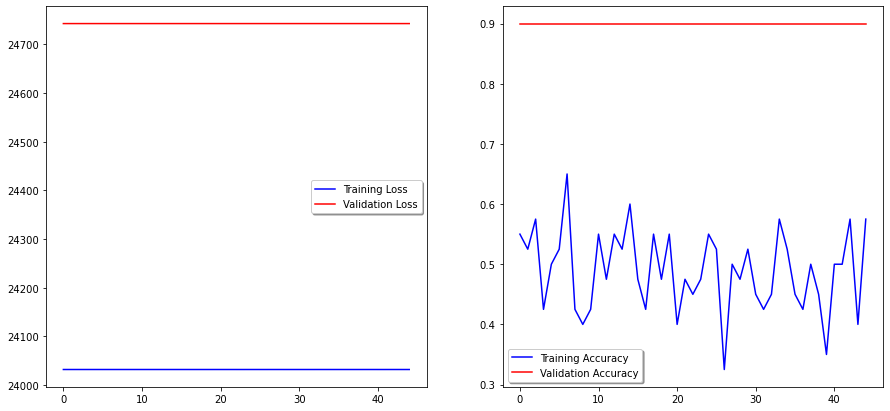

In [57]:

plt.figure(figsize=(15,7))
ax1 = plt.subplot(1,2,1)
ax1.plot(history.history['loss'], color='b', label='Training Loss') 
ax1.plot(history.history['val_loss'], color='r', label = 'Validation Loss',axes=ax1)
legend = ax1.legend(loc='best', shadow=True)
ax2 = plt.subplot(1,2,2)
ax2.plot(history.history['accuracy'], color='b', label='Training Accuracy') 
ax2.plot(history.history['val_accuracy'], color='r', label = 'Validation Accuracy')
legend = ax2.legend(loc='best', shadow=True)

This is the graph of 5th fold set training, this is not the expected visual, but I'm trying to improve it on such low data as possible.

* Note: The data set I used in my article was created according to tests, experience, research and some acceptances. Its main purpose is for enthusiasts and designers to comprehend Deep Learning through a subject they know. Results may vary depending on printer brand, environmental conditions, printer interface, material and even environmental conditions.